## ワインの種類

このデータフレームには、ワインの化学的特徴を示す13個の特徴量と、それぞれのワインが属するクラス（0, 1, 2のいずれか）を示すターゲット列が含まれています。

1. **特徴量 (Features):**
   - Alcohol: アルコールの濃度
   - Malic acid: リンゴ酸の濃度
   - Ash: 灰の濃度
   - Alcalinity of ash: 灰のアルカリ度
   - Magnesium: マグネシウムの濃度
   - Total phenols: 総フェノールの濃度
   - Flavanoids: フラボノイドの濃度
   - Nonflavanoid phenols: ノンフラボノイドフェノールの濃度
   - Proanthocyanins: プロアントシアニジンの濃度
   - Color intensity: 色の濃度
   - Hue: 色相
   - OD280/OD315 of diluted wines: 希釈されたワインの光学的密度
   - Proline: プロリンの濃度

2. **ターゲット列 (Target):**
   - 0: クラス1に属するワイン
   - 1: クラス2に属するワイン
   - 2: クラス3に属するワイン


## 1. 基本統計量の算出

### GPT スクリプト : データのインポート
* from sklearn.datasets import load_wine を利用
* load_wine() でwineデータセットをロード
* 特徴量を含むデータフレームに変換する。ターゲット列をデータフレームに追加する
* データフレーム名はdfとする
* データフレームdfを表示する
* Pythonコード

In [ ]:
import pandas as pd
from sklearn.datasets import load_wine

# ワインデータセットをロード
wine_data = load_wine()

# 特徴量を含むデータフレームに変換する
df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)

# ターゲット列をデータフレームに追加する
df['target'] = wine_data.target

df.to_csv('wine_data.csv')
# データフレームdfを表示する
df


alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  target  
0                            3.92   1065.0       0  
1                            3.40   1050.0       0  
2                            3.17   1185.0       0  
3                            3.45   1480.0       0  
4                            2.93    735.0       0  
..                            ...      ...     ...  
173                          1.74    740.0       2  
174                          1.56    750.0       2  
175                          1.56    835.0       2  
176                          1.62    840.0       2  
177                          1.60    560.0       2  

[178 rows x 14 columns]

### GPT プロンプト : 基本統計量の算出
   - Alcohol: アルコールの濃度
   - Malic acid: リンゴ酸の濃度
   - Ash: 灰の濃度
   - Alcalinity of ash: 灰のアルカリ度
   - Magnesium: マグネシウムの濃度
   - Total phenols: 総フェノールの濃度
   - Flavanoids: フラボノイドの濃度
   - Nonflavanoid phenols: ノンフラボノイドフェノールの濃度
   - Proanthocyanins: プロアントシアニジンの濃度
   - Color intensity: 色の濃度
   - Hue: 色相
   - OD280/OD315 of diluted wines: 希釈されたワインの光学的密度
   - Proline: プロリンの濃度

* target: wineの種類を示す目的変数（0、1、2）
* このデータ構造を使う
* データフレームdfの基本統計量を算出
* 基本統計量をcsvで保存
* 基本統計量をヒートマップで表示
* Pythonコード

In [ ]:
import seaborn as sns
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

# 基本統計量を算出
statistics = df.describe()

# 基本統計量をCSVで保存
statistics.to_csv('wine_statistics.csv')

# ヒートマップで基本統計量を表示
plt.figure(figsize=(12, 8))  # フィギュアサイズの調整
sns.heatmap(statistics, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Basic Statistics of Wine Dataset')
plt.show()


## 1. 基本統計量の算出：箱ひげ図

ボックスプロット（箱ひげ図）は、データの分布を視覚的に表現するための統計的グラフです。データの中央値、四分位範囲（データの広がりや散らばり具合）、外れ値を示すことができます。以下はボックスプロットの主な構成要素です：

1. **中央値（メディアン）**: データセットを二等分する値で、ボックスプロットの中央に横線で表示されます。
2. **四分位範囲（IQR: Interquartile Range）**: 下位25%（第1四分位数、Q1）と上位25%（第3四分位数、Q3）のデータの範囲を示します。この範囲はボックスの形で表され、データの中心的な50%を含みます。
3. **ボックス**: 第1四分位数から第3四分位数までの範囲を示し、データの中央50%がこの範囲に含まれます。
4. **ひげ（ホイスカー）**: ボックスの外に伸びる線で、通常、第1四分位数から1.5*IQRよりも低いデータ点と、第3四分位数から1.5*IQRよりも高いデータ点までを示します。これにより、データの全範囲（外れ値を除く）が視覚化されます。
5. **外れ値**: ひげの外にあるデータポイントで、通常は点で表されます。これらは、他のデータと比較して異常に高い値または低い値を持つデータポイントです。

ボックスプロットは、データセット内の異常値の検出、データの散らばり度合いの評価、そして異なるデータセットの中央値や分布の比較に特に有用です。データの分布形状（対称性や歪み）について直接的な情報は提供しませんが、データの要約として非常に役立ちます。

### GPT プロンプト : 箱ひげ図
* 数値カラムのボックスプロットを作成
* ボックスプロットの要約統計量をDataFrameに変換し、CSVファイルとして保存
* グラフは1行に5つのプロットが表示
* 各ボックスプロットには、それぞれのカラム名がタイトルとして表示
* boxplotは縦向き
* Pythonコード

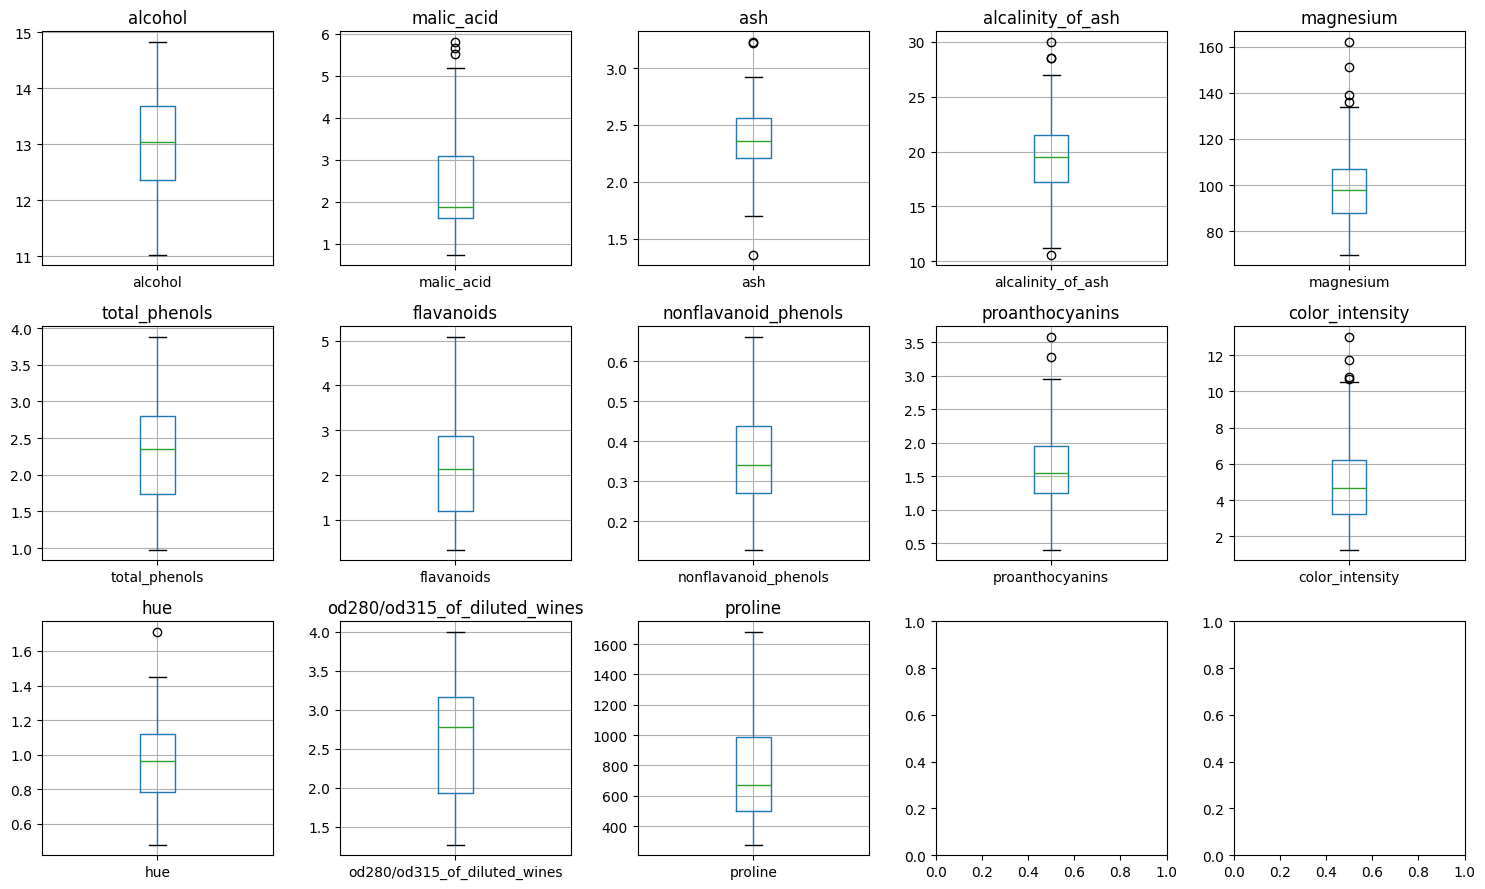

In [ ]:
# ボックスプロットを作成し、1行に5つのプロットが表示されるようにする
num_plots = df.shape[1] - 1  # ターゲット列を除く
num_rows = (num_plots - 1) // 5 + 1
fig, axes = plt.subplots(num_rows, 5, figsize=(15, num_rows * 3))

# ボックスプロットを作成し、要約統計量をDataFrameに変換して保存する
summary_statistics = pd.DataFrame()
for i, column in enumerate(df.columns[:-1]):  # ターゲット列を除く
    row_index = i // 5
    col_index = i % 5
    ax = axes[row_index, col_index] if num_rows > 1 else axes[col_index]
    df.boxplot(column=column, ax=ax, vert=True)
    ax.set_title(column)

    # ボックスプロットの要約統計量をDataFrameに追加
    summary_statistics[column] = df[column].describe()

# グラフのレイアウトを整える
plt.tight_layout()

# ボックスプロットの要約統計量をCSVファイルとして保存
summary_statistics.to_csv('wine_boxplot_summary_statistics.csv')

# グラフを表示
plt.show()


## 2. データの可視化：ヒストグラム

### GPT プロンプト : ヒストグラム
* 全ての数値カラムのヒストグラムを作成
* グラフは1行に3つのグラフが表示
* グラフの行数は数値カラムで決める
* 各ヒストグラムには、それぞれのカラム名がタイトルとして表示
* ヒストグラムは縦向き
* Pythonコード

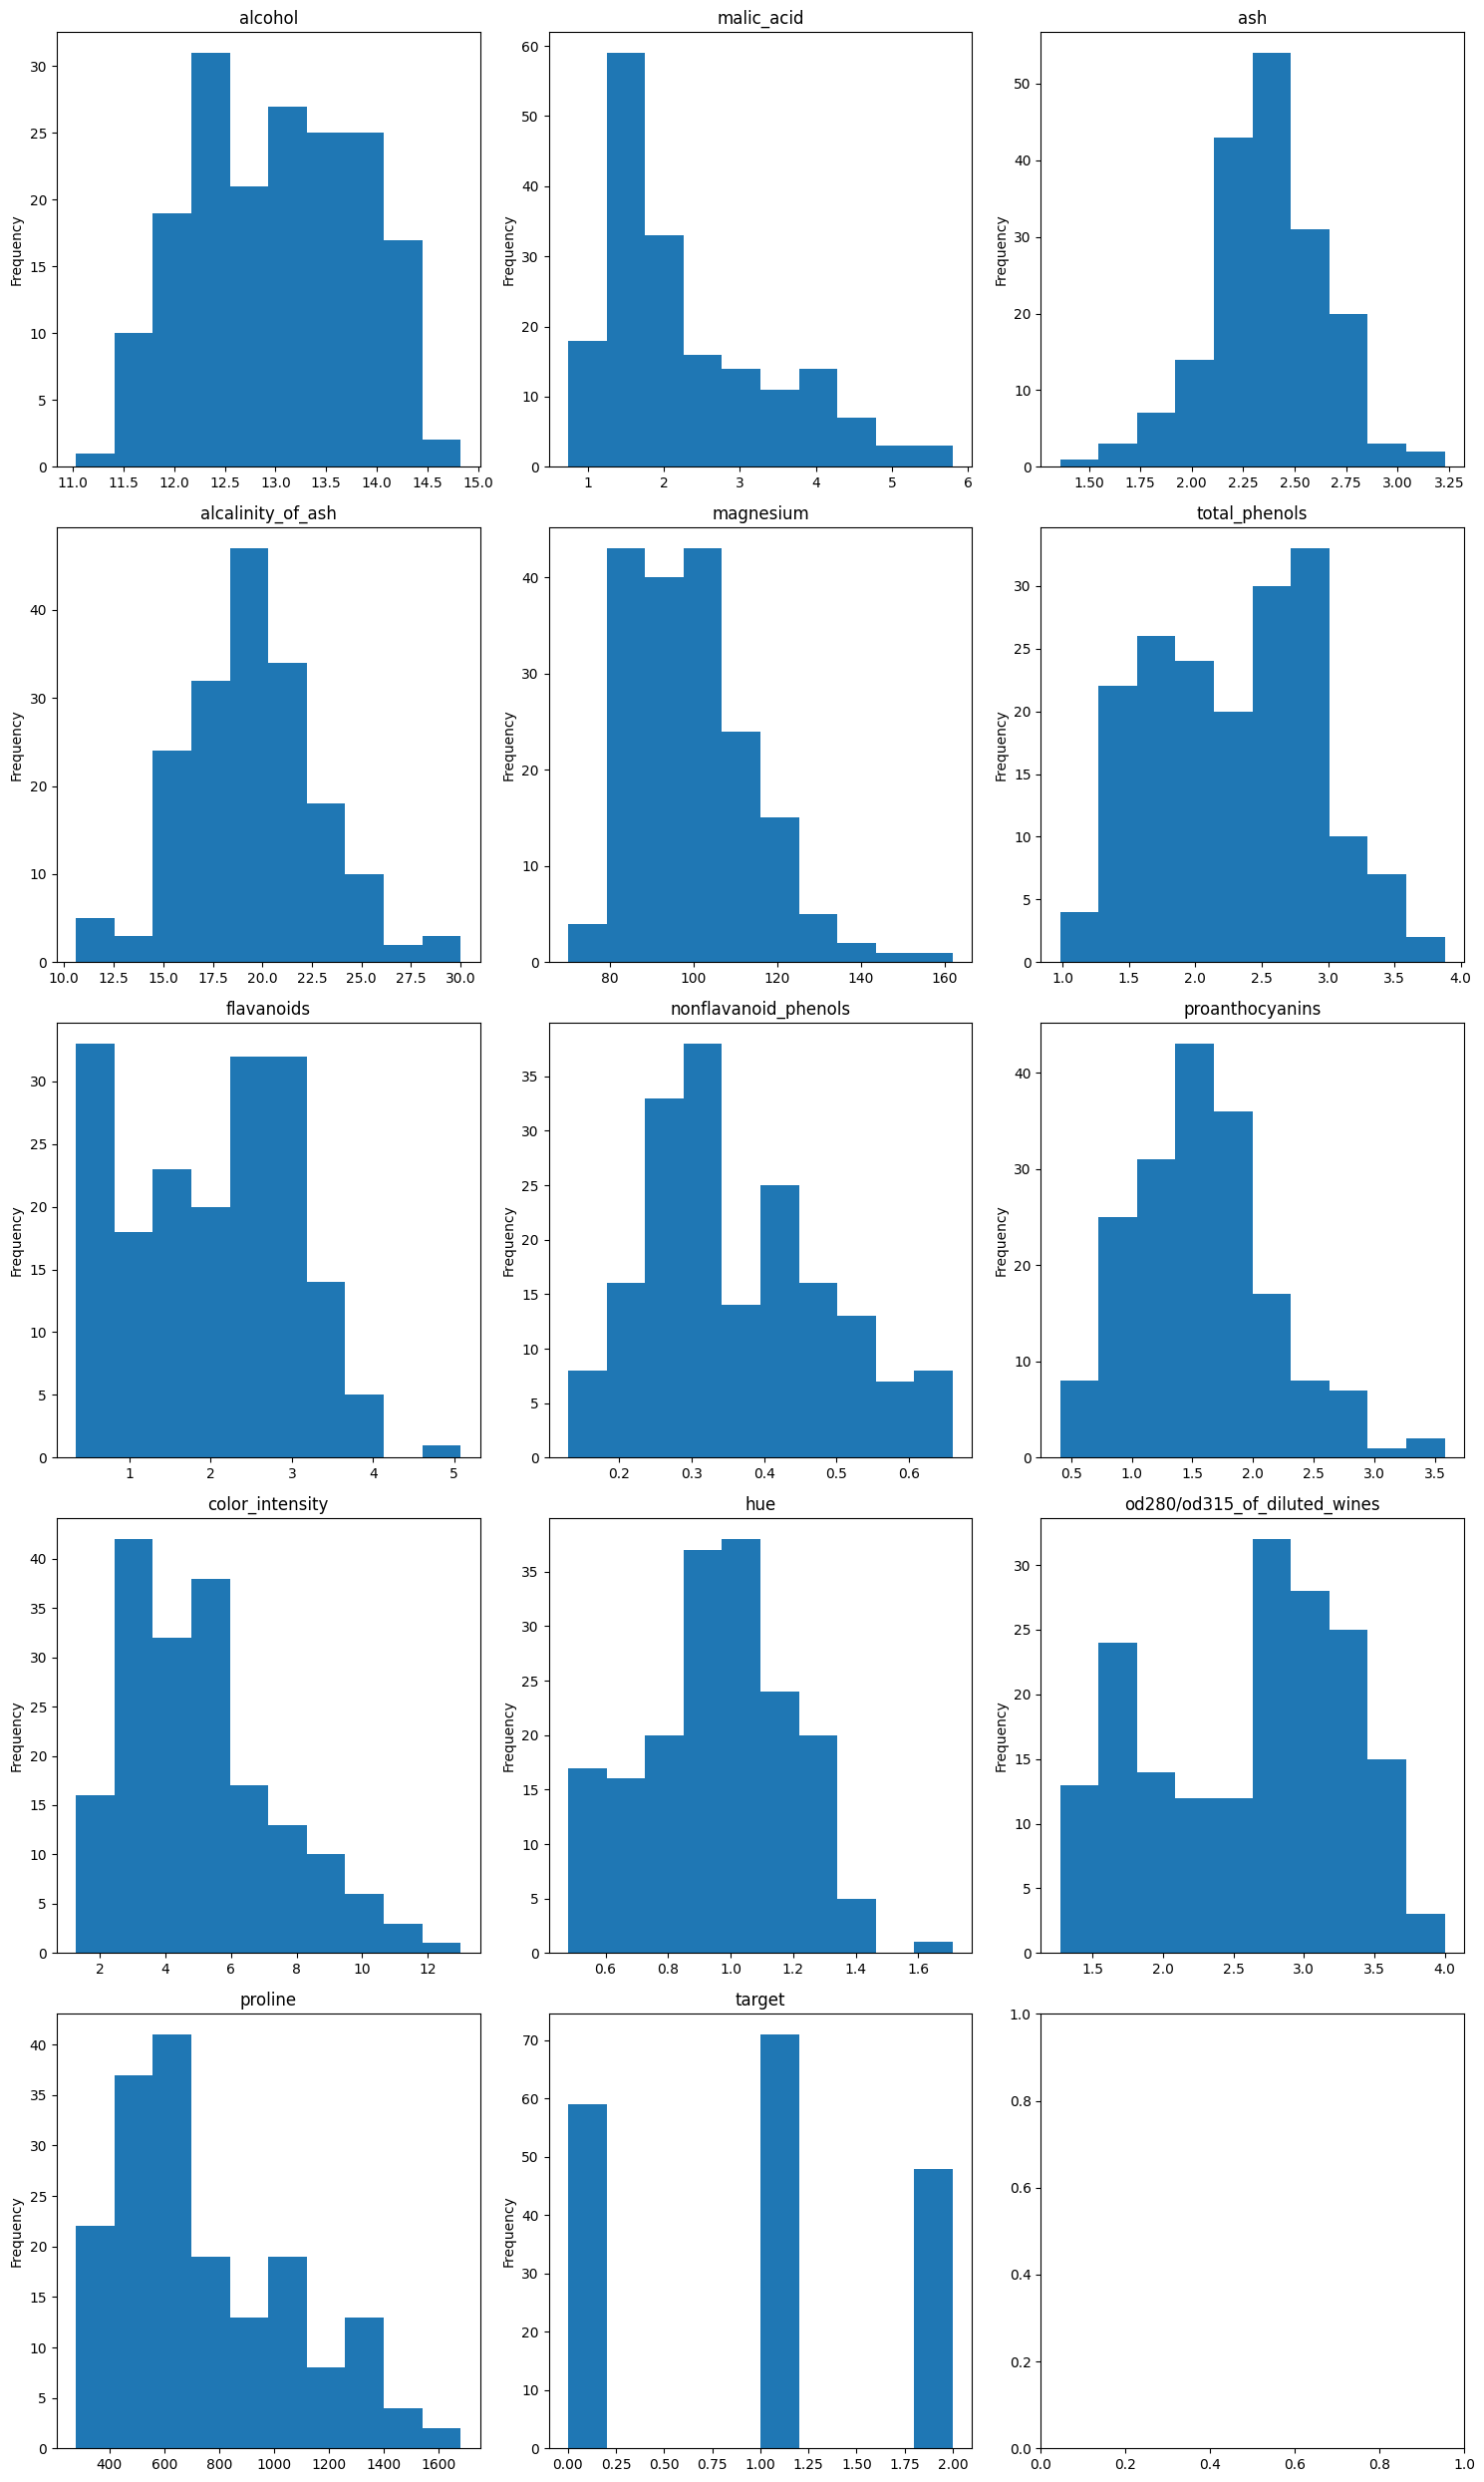

In [ ]:
# 数値カラムのみを選択
numeric_columns = df.select_dtypes(include='number').columns

# ヒストグラムを作成し、1行に3つのグラフが表示されるようにする
num_plots = len(numeric_columns)
num_rows = (num_plots - 1) // 3 + 1
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

# ヒストグラムを作成
for i, column in enumerate(numeric_columns):
    row_index = i // 3
    col_index = i % 3
    ax = axes[row_index, col_index] if num_rows > 1 else axes[col_index]
    df[column].plot(kind='hist', ax=ax)
    ax.set_title(column)

# グラフのレイアウトを整える
plt.tight_layout()

# グラフを表示
plt.show()


## 2. データの可視化：散布図

量的データと質的データの組み合わせを可視化するためのさまざまな方法を以下にまとめます。

1. **散布図（Scatter plot）**: 量 × 量
   - 量的変数と量的変数の関係を視覚化するのに適しています。
   - 例えば、身長（量的データ）と体重（量的データ）の関係を見ることができます。
   - 質的変数が2つの場合は、散布図の色分けやマーカーの形状を使って区別することができます。

2. **箱ひげ図（Boxplot）**: 質 × 量
   - 量的変数を質的変数でグループ分けして、各グループの分布を比較するのに適しています。
   - 例えば、都道府県（質的データ）ごとに病院数（量的データ）の分布を比較することができます。

3. **クロス集計表（Cross-tabulation）**: 質 × 質
   - 2つの質的変数の関係をまとめた表です。各セルにはそれぞれの組み合わせに対応するデータの個数が表示されます。
   - 例えば、性別（質的データ）と好きなスポーツ（質的データ）の関係を示すことができます。

4. **グループ化された棒グラフ（Grouped bar chart）**: 積み上げグラフ
   - 2つの質的変数の組み合わせによる量的変数の平均値などの統計量を視覚化するのに適しています。
   - 例えば、都道府県（質的データ）ごとに男女の平均身長（量的データ）を比較することができます。

5. **バブルチャート（Bubble chart）**:
   - 2つの量的変数と1つの質的変数を組み合わせて可視化するのに使用されます。
   - 例えば、都道府県（質的データ）ごとの人口（量的データ）、平均所得（量的データ）をバブルの大きさや色で表現することができます。

これらの方法を使用することで、量的データと質的データの組み合わせによるパターンや関係を効果的に可視化することができます。

### GPT プロンプト : 散布図
* 全ての数値カラムの組み合わせで散布図を作成
* seabornのライブラリを使い、マトリックス表示
* 回帰直線も描く
* Pythonコード

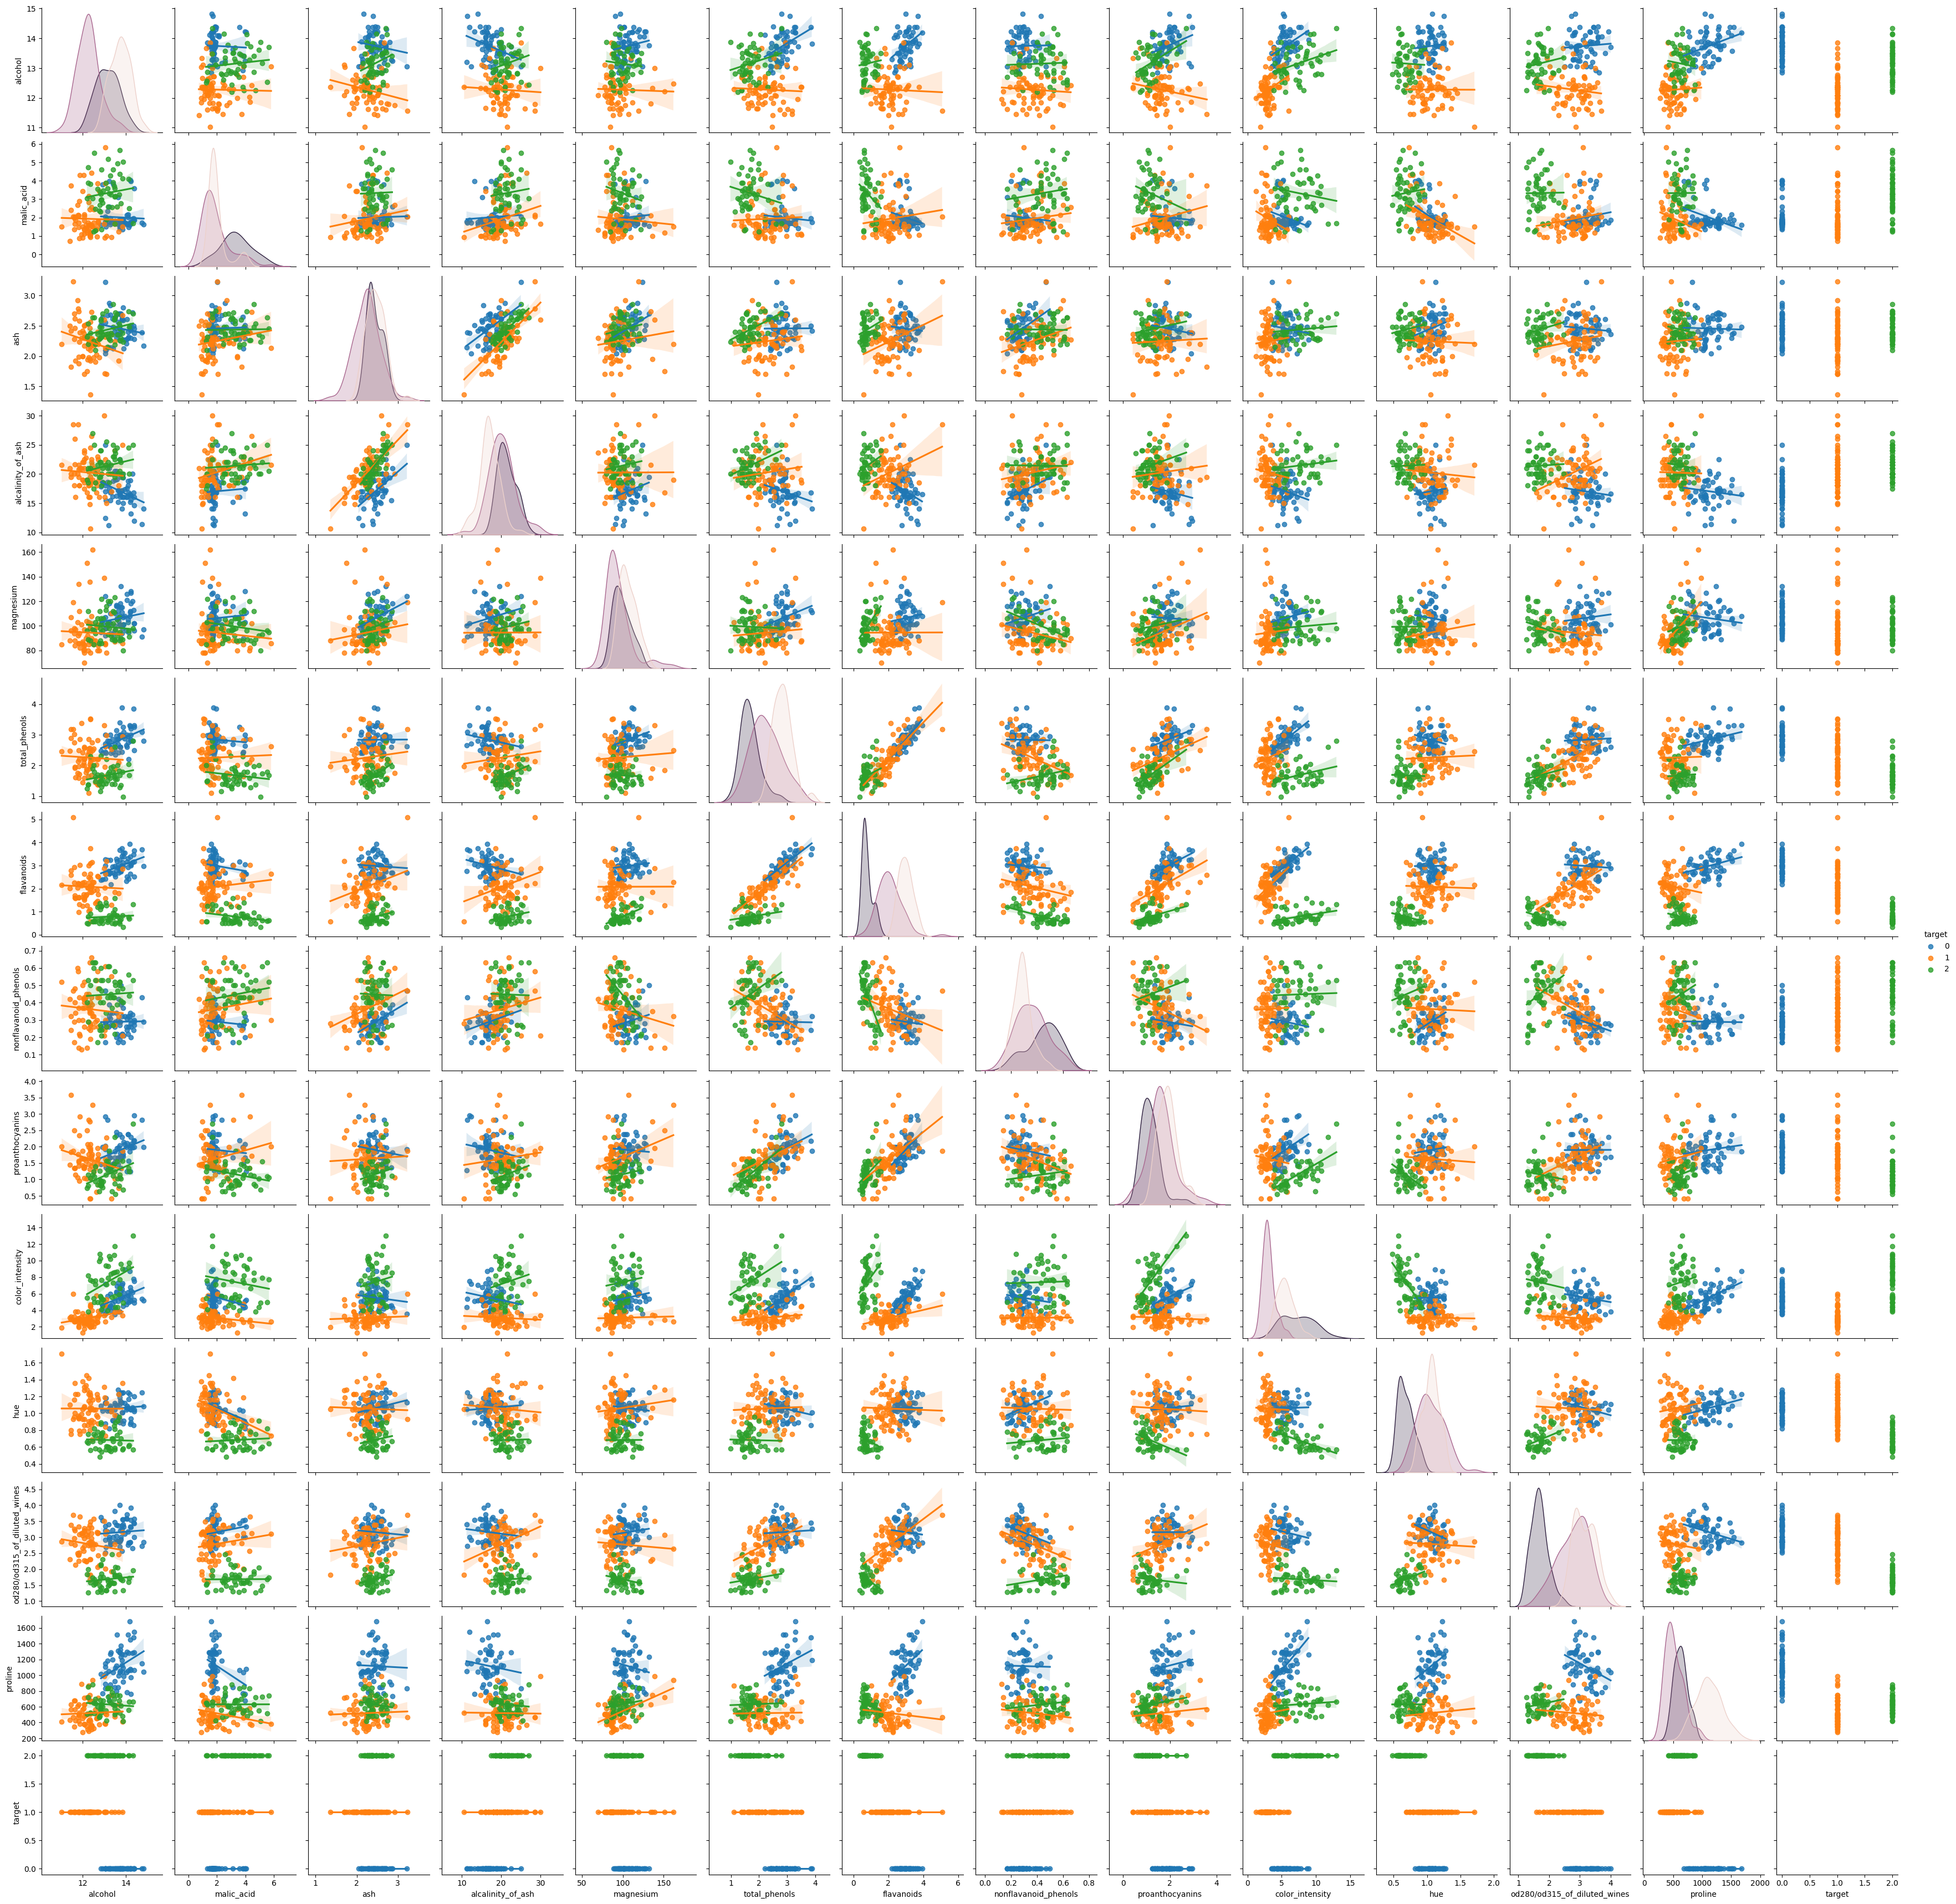

In [ ]:
# seabornのpairplotを使って散布図行列を作成
sns.pairplot(df, vars=numeric_columns, hue='target', kind='reg')

# グラフを表示
plt.show()


## 2. データの可視化：相関係数行列

### GPT プロンプト : 相関係数行列
* 全ての数値カラムの組み合わせで相関係数行列を作成
* ヒートマップで表示
* Pythonコード

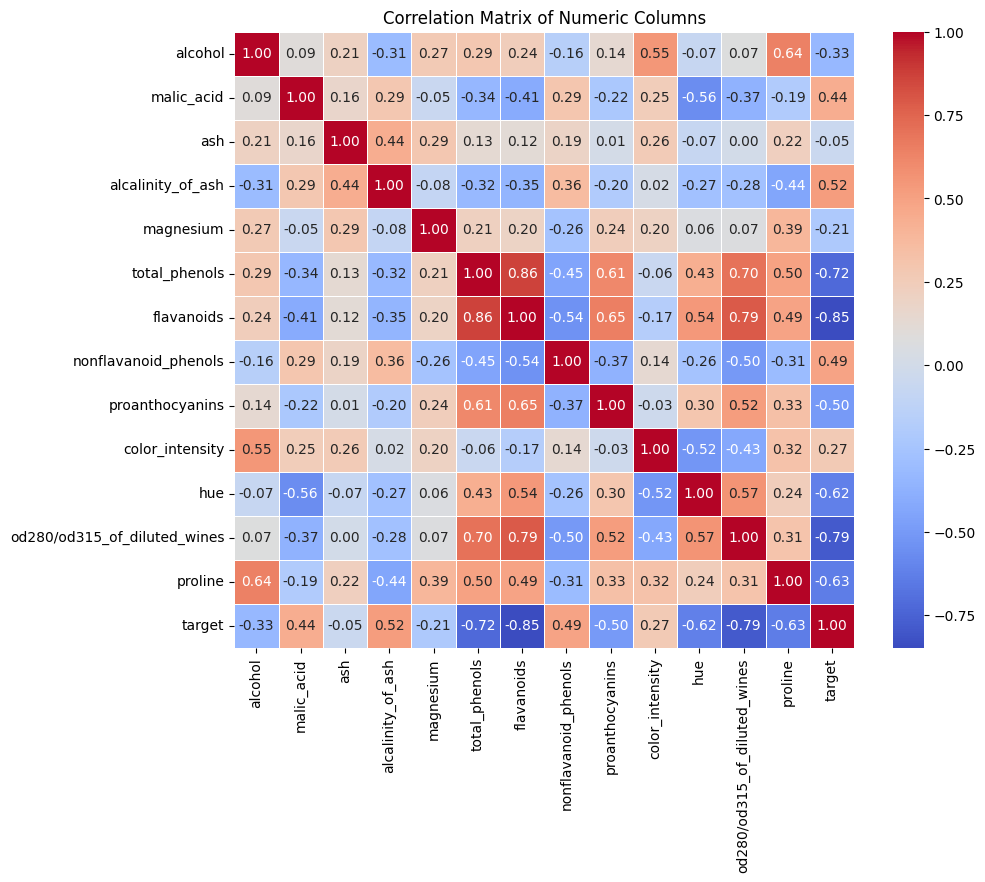

In [ ]:
# 数値カラムのみを選択
numeric_df = df.select_dtypes(include='number')

# 相関係数行列を計算
correlation_matrix = numeric_df.corr()

# ヒートマップで相関係数行列を表示
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()



## 3. クラスタリング(教師無し学習)



* K-Means法 (scikit-learnを利用)  

k-means法は、データをクラスターに分割するための非階層的なクラスタリング手法です。この手法は、与えられたデータをk個のクラスターに分割し、各クラスターの重心（centroid）を求めることで実現されます。

具体的な手順は以下の通りです：

クラスター数の決定: 最初に、分割したいクラスターの数kを決定します。
* 初期中心点の選択: データ内のランダムな点を初期の中心点（centroid）として選択します。
* データポイントの割り当て: 各データポイントを最も近い中心点に割り当てます。
* 中心点の更新: 各クラスターの中心点を、そのクラスターに割り当てられたデータポイントの平均位置に移動します。
* 収束の確認: 中心点の更新とデータポイントの再割り当てを繰り返し行い、クラスターが変化しなくなったときにアルゴリズムを終了します。
* k-means法の目的は、各データポイントを異なるクラスターに割り当てることで、クラスター内の類似性を最大化し、クラスター間の差異を最小化することです。結果として得られる各クラスターは、内部的には類似した特性を持つデータポイントのグループです。



### GPT プロンプト
* k-means法を実施
* データフレームdfを利用
* target以外の項目を利用
* クラスタ数は3とする
* 初期値の乱数は固定とする
* 各要素の平均値をboxplotで要素ごとグラフにしてクラスタ比較をする
* クラスタリング結果をdfに列名'cluster'で追加する
* このcluster列を追加したデータフレームを'cluster_df'として保存する
* Pythonコード

In [ ]:
from sklearn.cluster import KMeans

# k-means法を実行
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df.drop('target', axis=1))  # target列以外を使用するため、dropメソッドでtarget列を削除

# クラスタリング結果をデータフレームに追加
df['cluster'] = kmeans.labels_

# 各要素の平均値をBoxplotで要素ごとにグラフ化し、クラスタ比較を行う
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1]):  # target列以外の各要素に対して繰り返し
    plt.subplot(3, 5, i+1)
    df.boxplot(column, by='cluster', ax=plt.gca())
    plt.title(column)
    plt.xlabel('Cluster')
    plt.ylabel('Value')
plt.tight_layout()
plt.show()

# クラスタ列を追加したデータフレームを保存
cluster_df = df.copy()  # クラスタ列を追加したデータフレームをコピー
cluster_df.to_csv('cluster_df.csv', index=False)  # CSVファイルとして保存

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### GPT プロンプト
* cluster_dfを用いて混同行列を作成する
* cluster_dfのtargetとclusterの番号のマッピングは{0 : 1, 1 : 0, 2 : 2}とする
* clusterの番号をマッピングを利用して変更し、混同行列を作成する
* 混同行列で正解率、適合率、再現率、F1スコアを表示する
* 混同行列はヒートマップで表示する

Confusion Matrix:
[[46  0 13]
 [ 1 50 20]
 [ 0 19 29]]

Accuracy: 0.702247191011236
Precision: 0.7395818489697105
Recall: 0.702247191011236
F1 Score: 0.7147804707482469


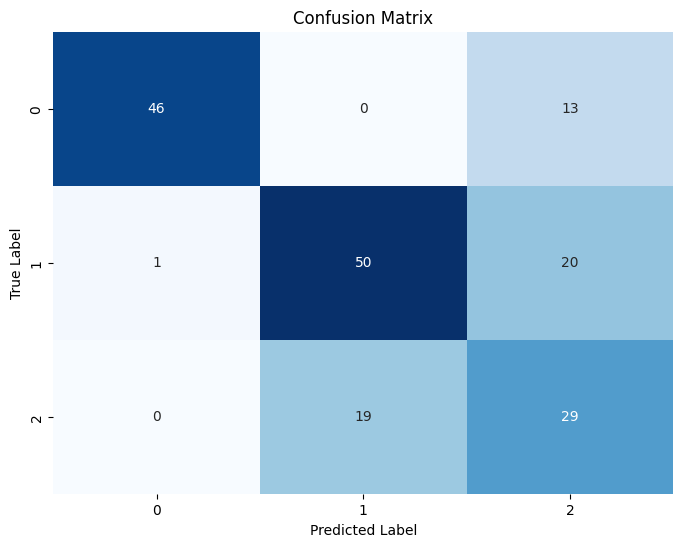

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# マッピングの辞書(結果で変更する)
mapping = {0: 1, 1: 0, 2: 2}

# cluster列をマッピングを使って変更
cluster_df['cluster'] = cluster_df['cluster'].map(mapping)

# target列とcluster列を取得
target = cluster_df['target']
cluster = cluster_df['cluster']

# 混同行列を作成
conf_matrix = confusion_matrix(target, cluster)

# 混同行列を表示
print("Confusion Matrix:")
print(conf_matrix)

# 正解率を計算
accuracy = accuracy_score(target, cluster)
print("\nAccuracy:", accuracy)

# 適合率、再現率、F1スコアを計算
precision = precision_score(target, cluster, average='weighted')
recall = recall_score(target, cluster, average='weighted')
f1 = f1_score(target, cluster, average='weighted')
print("Precision:", precision)  # 適合率
print("Recall:", recall)  # 再現率
print("F1 Score:", f1)  # F1スコア

# ヒートマップで混同行列を表示
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## 4. 主成分分析

主成分分析（Principal Component Analysis、PCA）は、多変量データの次元削減とデータの可視化によく用いられる統計的手法です。PCAは、元の特徴量の情報をできるだけ保持しながら、新しい変数（主成分）にデータを変換することで、データセットの次元を削減します。

主成分分析の主な目的は、データの持つ情報を最大限に保持しながら、データの構造やパターンを理解することです。具体的には、以下のような利点があります：

1. **次元削減**:
   - 元のデータセットが多次元の場合、主成分分析はデータの次元を削減し、情報を失うことなくデータの本質的な特性を捉えます。これにより、高次元のデータをより低次元の空間にマッピングすることが可能になります。

2. **可視化**:
   - 主成分分析によって得られた主成分は、視覚化に適した形式であり、データセットの構造やパターンを理解するのに役立ちます。特に、2次元または3次元の主成分空間では、データをプロットして視覚的に解釈することが容易です。

3. **特徴量の重要度の理解**:
   - 主成分分析は、元の特徴量と主成分との関係性を示す主成分負荷（重み）を提供します。これにより、どの特徴量が主成分に大きく影響しているかを理解し、データセット内の重要なパターンや相関関係を特定することができます。

4. **ノイズの除去**:
   - 主成分分析は、データ内のノイズや冗長性を排除する効果があります。主成分はデータの変動性に基づいて決定されるため、ノイズの影響を減らし、データセットの本質的な構造をより良く捉えることができます。

総括すると、主成分分析は複雑なデータセットの解析や可視化、モデリングに広く使用される強力なツールです。データの情報を最大限に活用しながら、データセットの特性やパターンを効果的に把握することができます。

主成分分析（PCA）を実行する手順を以下に示します：

1. **データの準備**:
   - 分析対象のデータセットを準備します。データセットは観測値（サンプル）が行に配置され、それぞれの観測値に対する特徴量が列に配置されている必要があります。

2. **データの標準化**:
   - 主成分分析は、特徴量のスケールの違いが結果に影響を与える可能性があるため、特徴量を標準化します。これにより、すべての特徴量が平均が0で標準偏差が1になります。

3. **主成分分析の実行**:
   - 標準化されたデータに対してPCAを実行します。PCAは、特徴量間の共分散を考慮してデータを新しい特徴空間に射影することで、特徴量を線形に組み合わせた新しい特徴量（主成分）を生成します。

4. **主成分の選択**:
   - 主成分分析の結果得られる主成分は、元の特徴量の線形結合であり、元の特徴量の変動性を説明します。通常、累積寄与率や固有値などの指標を用いて、どの程度の主成分を選択するかを決定します。

5. **結果の解釈**:
   - 主成分の解釈は元の特徴量との関係性を理解することから始まります。主成分のウェイト（係数）を確認し、各主成分が元の特徴量とどのような関係を持っているかを分析します。

6. **結果の可視化**:
   - 主成分空間でのデータのプロットや主成分のウェイトの可視化を行うことで、データの構造や変数間の関係を理解しやすくします。

以上が主成分分析の一般的な手順です。この手順に従うことで、データセットの次元削減やパターンの特定など、さまざまな目的に応じた主成分分析を行うことができます。

### GPT プロンプト : 主成分分析

* dfを利用
* 全ての数値カラムを利用(targetは除く)
* 利用数値カラムに対して、標準化を実施(StandardScaler)
* 累積寄与率80%で主成分分析を実施、以下得られた主成分のみを利用する
* 得られた各主成分でパレート図を描く(累積寄与率)
* 主成分ごとの変数の重み（ウェイト）(components_)を取得し、各主成分の寄与率を加え、データフレーム化してcsvで保存
* 各主成分のカラムをx軸とした棒グラフをウエイトごと作成(説明変数のみ)
* PC1とPC2の散布図を作成し、各カラムの方向を矢印で示し、各点をtargetの値で色分けする
* Pythonコード

矢印の長さ、カラム名のラベルは各自調整

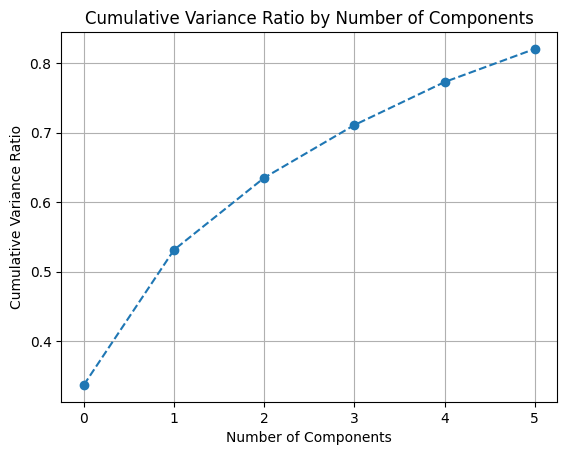

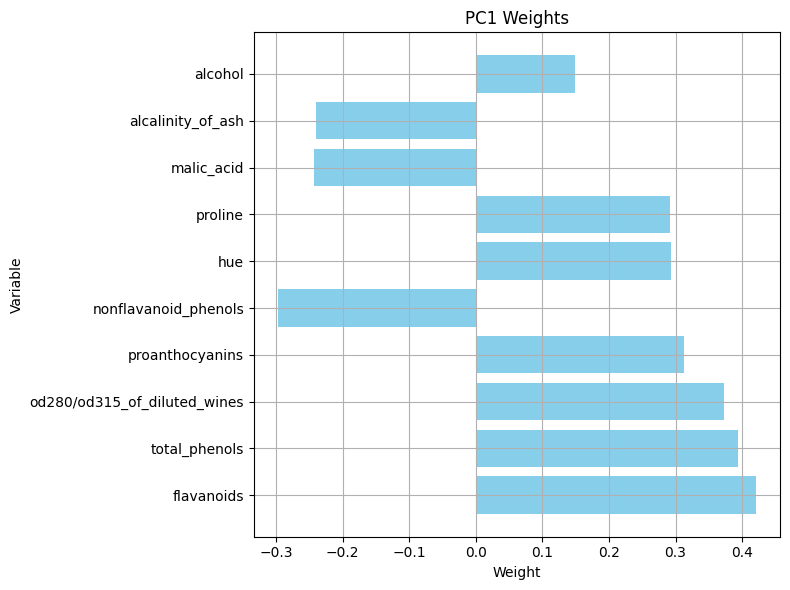

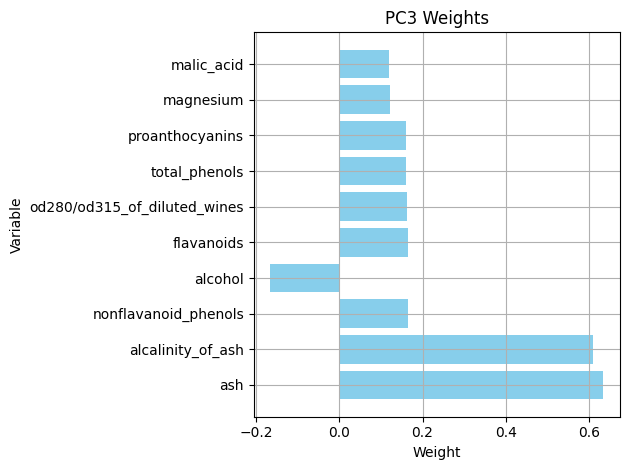

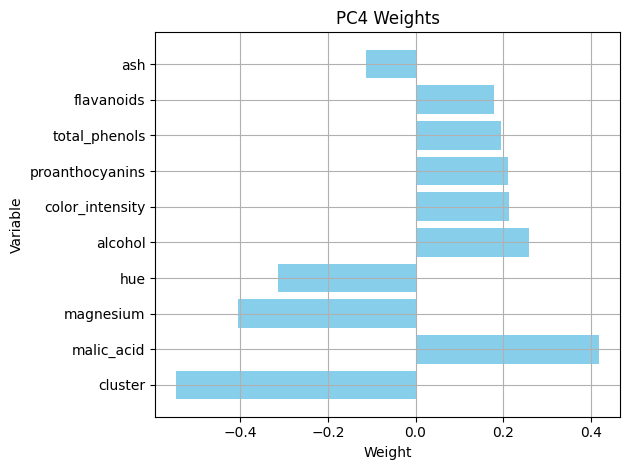

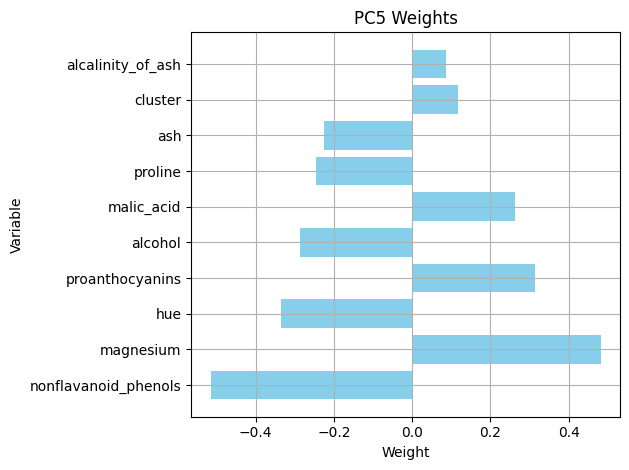

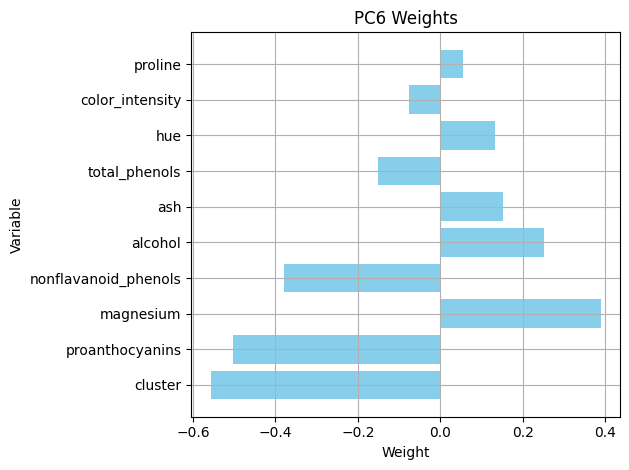

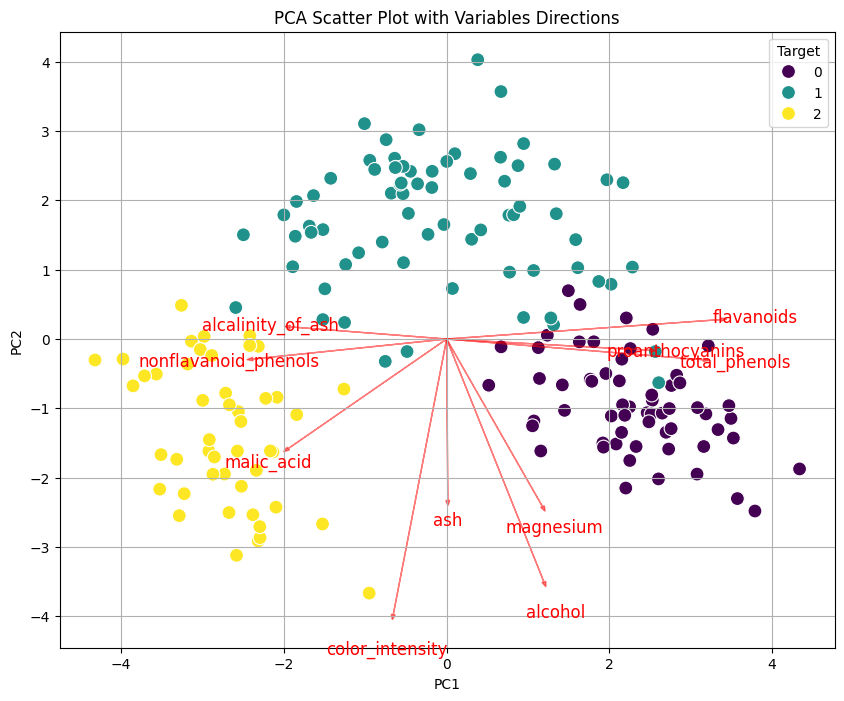

In [ ]:
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 数値カラムのみを抽出
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# target列を除外
numeric_columns.remove('target')

# 標準化
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_columns])

# PCAを実行
pca = PCA(n_components=0.8)
pca_data = pca.fit_transform(scaled_data)

# 累積寄与率の計算とパレート図の作成
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Ratio')
plt.title('Cumulative Variance Ratio by Number of Components')
plt.grid(True)
plt.show()

# 主成分得点のデータフレームを作成
pca_df = pd.DataFrame(data=pca_data, columns=['PC{}'.format(i+1) for i in range(pca_data.shape[1])])

# パレート図の作成
weights = pca.components_
sorted_indices = np.argsort(np.abs(weights), axis=1)[:, ::-1]
sorted_columns = [np.array(numeric_columns)[sorted_indices[i]] for i in range(len(pca.components_))]

plt.figure(figsize=(8, 6))
for i, component in enumerate(weights, 1):
    plt.barh(sorted_columns[i-1][:10], component[sorted_indices[i-1]][:10], color='skyblue')
    plt.title(f'PC{i} Weights')
    plt.xlabel('Weight')
    plt.ylabel('Variable')
    plt.tight_layout()
    plt.grid()
    plt.show()

# 各主成分の重みと寄与率をDataFrameに保存
weights_df = pd.DataFrame()
for i, component in enumerate(weights, 1):
    component_df = pd.DataFrame({
        'Variable': sorted_columns[i-1][:len(component)],
        'Weight': component[sorted_indices[i-1]][:len(component)],
        'Contribution Ratio': pca.explained_variance_ratio_[i-1]
    })
    weights_df = pd.concat([weights_df, component_df])

# データフレームをCSVファイルとして保存
weights_df.to_csv('weights.csv', index=False)

# PC1とPC2の散布図を作成
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=df['target'], palette='viridis', s=100)
for i, variable in enumerate(numeric_columns[:10]):  # 最初の10変数のみを表示
    plt.arrow(0, 0, pca.components_[0, i]*8, pca.components_[1, i]*8, color='red', alpha=0.5, head_width=0.05)
    plt.text(pca.components_[0, i]*9, pca.components_[1, i]*9, variable, color='red', fontsize=12, ha='center', va='center')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatter Plot with Variables Directions')
plt.legend(title='Target')
plt.grid(True)
plt.show()


## 5. 精度向上の取り組み : 主成分分析の利用

主成分分析を使ったクラスタリングの流れは以下のようになります：

1. **データの準備**:
   - 分析対象のデータセットを準備します。データは数値型である必要があります。また、必要に応じて欠損値の処理やデータのスケーリング（標準化など）を行います。

2. **主成分分析の実行**:
   - 準備したデータセットに対して主成分分析（PCA）を実行します。これにより、元の特徴量を新しい線形結合である主成分に変換します。

3. **主成分の選択**:
   - 分析目的や次元削減の目標に基づいて、いくつかの主成分を選択します。通常は、累積寄与率や固有値などを参考にして適切な主成分の数を決定します。

4. **射影行列の取得**:
   - 選択した主成分に対応する射影行列を取得します。これは、元の特徴量と主成分との間の重みを示します。

5. **データの主成分空間への射影**:
   - 取得した射影行列を使用して、元のデータを主成分空間に射影します。これにより、各データポイントが主成分に沿って新しい座標系に変換されます。

6. **クラスタリングの実行**:
   - 射影されたデータを対象に、選択したクラスタリング手法（ここではk-means）を実行します。クラスタ数は事前に決定する必要があります。

7. **クラスタリング結果の可視化**:
   - クラスタリングされたデータを可視化するために、主成分空間上でデータポイントをプロットします。ここでは、主成分1と主成分2を軸にしてデータをプロットし、各クラスタを異なる色で表示します。

8. **クラスタリング結果の解釈**:
   - クラスタリングされたデータを分析し、各クラスタが表す意味や特性を理解します。必要に応じて、クラスタリング結果に基づいてデータのセグメンテーションや特性の把握を行います。

このように、主成分分析を用いたクラスタリングでは、データの次元削減とクラスタリングが組み合わされ、データの構造やパターンを理解するための効果的な手法となります。

### GPT プロンプト : クラスタリング

* dfを利用
* PCAではtargetは利用しない
* PCAによって得られた射影行列を使用して、元のデータを主成分空間に射影する(累積寄与率が80％)
* 射影されたデータに対してK-meansクラスタリングを実行(クラスタ数3, n_clusters=3)
* クラスタリング結果を'cluster_pca'列に登録
* クラスタリング結果をPC1とPC2を使い散布図で表示(Target値で色分け、クラスタで形を変える)
* targetとクラスタリング結果を比較(targetとクラスタの表を作成)
* クラスタリング結果を元のデータフレームに追加し、CSVファイルとして保存(ファイル名：cluster_pca_df.csv)

In [ ]:
# 数値カラムのみを抽出
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# target列を除外
numeric_columns.remove('target')

# 標準化
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_columns])

# PCAを実行
pca = PCA(n_components=0.8)
pca_data = pca.fit_transform(scaled_data)

# 射影されたデータに対してK-meansクラスタリングを実行
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(pca_data)

# クラスタリング結果を元のデータフレームに追加
df['cluster_pca'] = cluster_labels

# PC1とPC2の散布図を作成し、クラスタとtargetで色分け
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df['target'], style=df['cluster_pca'], palette='viridis', s=100)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatter Plot with Clustering Results')
plt.legend(title='Target')
plt.grid(True)
plt.show()

# targetとクラスタリング結果を比較して表を作成
comparison_df = pd.DataFrame({'target': df['target'], 'cluster': df['cluster_pca']})
print(comparison_df)

# クラスタリング結果を元のデータフレームに追加し、CSVファイルとして保存
df.to_csv('cluster_pca_df.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


     target  cluster
0         0        1
1         0        1
2         0        1
3         0        1
4         0        1
..      ...      ...
173       2        2
174       2        2
175       2        2
176       2        2
177       2        2

[178 rows x 2 columns]


### GPT プロンプト
* comparison_dfを用いて混同行列を作成する
* comparison_dfのtargetとclusterの番号のマッピングは{0 : 0, 1 : 1, 2 : 2}とする
* clusterの番号をマッピングを利用して変更し、混同行列を作成する
* 混同行列で正解率、適合率、再現率、F1スコアを表示する
* 混同行列はヒートマップで表示する

Confusion Matrix:
[[59  0  0]
 [ 8 60  3]
 [ 0  0 48]]

Accuracy: 0.9382022471910112
Precision: 0.9445600812855748
Recall: 0.9382022471910112
F1 Score: 0.9372898356087309


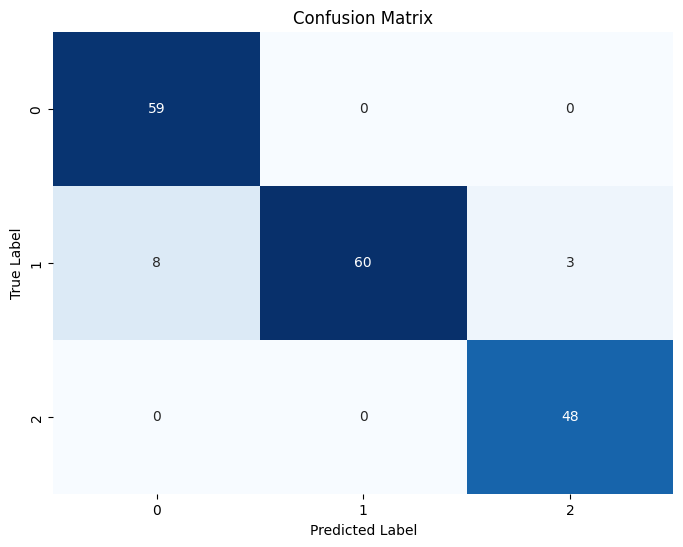

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# マッピングの辞書(結果で変更する)
mapping = {0: 1, 1: 0, 2: 2}

# cluster列をマッピングを使って変更
comparison_df['cluster'] = comparison_df['cluster'].map(mapping)

# target列とcluster列を取得
target = comparison_df['target']
cluster = comparison_df['cluster']

# 混同行列を作成
conf_matrix = confusion_matrix(target, cluster)

# 混同行列を表示
print("Confusion Matrix:")
print(conf_matrix)

# 正解率を計算
accuracy = accuracy_score(target, cluster)
print("\nAccuracy:", accuracy)

# 適合率、再現率、F1スコアを計算
precision = precision_score(target, cluster, average='weighted')
recall = recall_score(target, cluster, average='weighted')
f1 = f1_score(target, cluster, average='weighted')
print("Precision:", precision)  # 適合率
print("Recall:", recall)  # 再現率
print("F1 Score:", f1)  # F1スコア

# ヒートマップで混同行列を表示
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### GPT プロンプト : クラスタリングを使ったboxplot

* dfを利用, cluster_pca列をクラスタ番号として利用
* 各要素の値をboxplotで要素ごとグラフを作成し、クラスタ比較をする
* Pythonコード

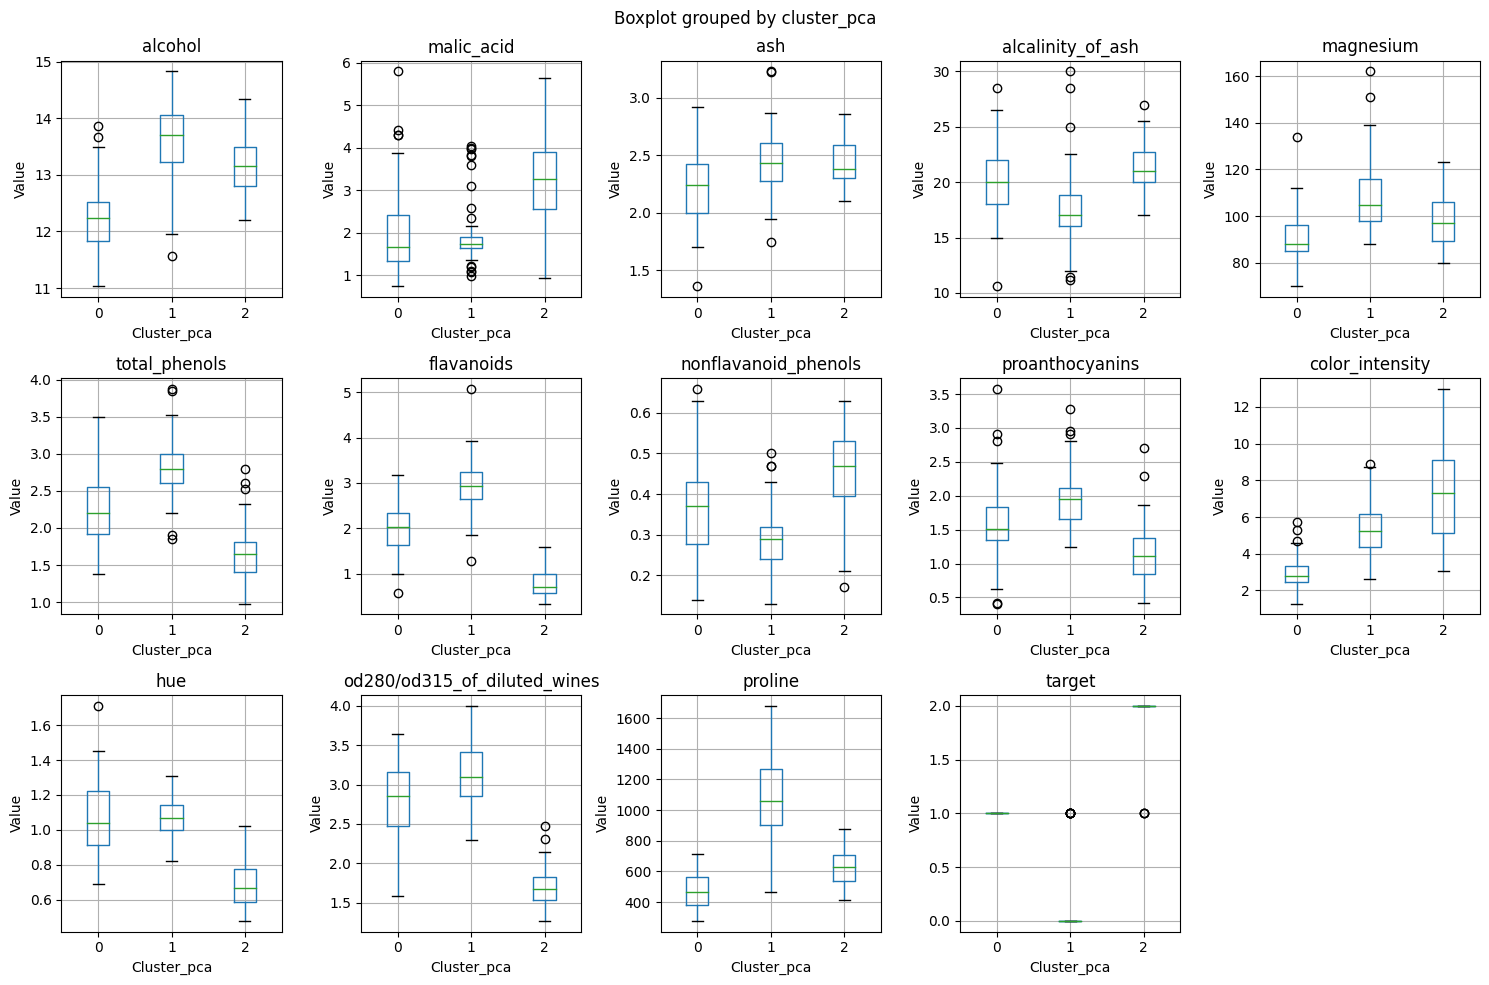

In [ ]:
# 各要素の平均値をBoxplotで要素ごとにグラフ化し、クラスタ比較を行う
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-2]):  # target列以外の各要素に対して繰り返し
    plt.subplot(3, 5, i+1)
    df.boxplot(column, by='cluster_pca', ax=plt.gca())
    plt.title(column)
    plt.xlabel('Cluster_pca')
    plt.ylabel('Value')
plt.tight_layout()
plt.show()


### GPT プロンプト : 積み上げグラフ

* 与えられたデータフレームをクラスタごとに平均値を計算する(Targetとクラスタ番号は除く)
* 各クラスタ内の各項目の合計を100％として正規化する
* 正規化されたデータを積み上げ棒グラフとしてプロット
* クラスタに所属する数に依存しないように、各項目毎、クラスタの平均値を利用し、その平均を100%に正規化
* x軸は各項目、y軸はクラスタの積み上げ値
* Pythonコード

In [ ]:
# クラスタごとにデータを分割し、Targetとクラスタ番号を除外
cluster_data = df.drop(columns=['target', 'cluster']).groupby('cluster_pca').mean()

# クラスタの平均値を使用して正規化
normalized_data = cluster_data.div(cluster_data.mean(), axis=1) * 100

# 積み上げ棒グラフをプロット
plt.figure(figsize=(15, 8))
normalized_data.T.plot(kind='bar', stacked=True)
plt.title('Normalized Data by Feature and Cluster')
plt.xlabel('Features')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.legend(title='Cluster')
plt.show()


<Figure size 1500x800 with 0 Axes>